In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 76.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 59.5MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
data_train = pd.read_csv('game_of_thrones_train.csv', sep = ',', index_col='S.No')
data_test = pd.read_csv('game_of_thrones_test.csv', sep = ',', index_col='S.No')
print(data_train.shape, data_test.shape)
# data.head()

(1557, 25) (389, 24)


In [124]:
data_train_ = data_train.copy()
data_test_ = data_test.copy()
print(data_train_.columns)
print(data_test_.columns)

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')
Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')


In [125]:
# first feature IsPopular
data_train_['isPopular'] = [1 if popularity > 0.5 else 0 for popularity in data_train_.popularity ]
# second feature boolDeadRelations
data_train_['boolDeadRelations'] = [1 if num_of_dead > 0 else 0 for num_of_dead in data_train_['numDeadRelations']]

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

cult_reverse = {term: culture for culture, terms in cult.items() for term in terms}

for i, row in data_train_.iterrows():
  cur_cult = row['culture']
  if pd.isna(cur_cult):
    continue
  else:
    for k, v in cult_reverse.items():
      if str(cur_cult).lower() == k:
        data_train_.loc[i, 'culture'] = v

data_train_.head(1)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,11,0.605351,0,1,1


In [126]:
# first feature IsPopular
data_test_['isPopular'] = [1 if popularity > 0.5 else 0 for popularity in data_test_.popularity ]
# second feature boolDeadRelations
data_test_['boolDeadRelations'] = [1 if num_of_dead > 0 else 0 for num_of_dead in data_test_['numDeadRelations']]

for i, row in data_test_.iterrows():
  cur_cult = row['culture']
  if pd.isna(cur_cult):
    continue
  else:
    for k, v in cult_reverse.items():
      if str(cur_cult).lower() == k:
        data_test_.loc[i, 'culture'] = v

data_test_.head(1)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,NaN,0,0,100.0,0,0.050167,0,0


In [127]:
print(data_train_.info())
print(*data_train_.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   dateOfBirth        279 non-null    float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1176 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

In [128]:
print(data_test_.info())
print(*data_test_.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               389 non-null    object 
 1   title              221 non-null    object 
 2   male               389 non-null    int64  
 3   culture            189 non-null    object 
 4   dateOfBirth        154 non-null    float64
 5   mother             3 non-null      object 
 6   father             4 non-null      object 
 7   heir               2 non-null      object 
 8   house              343 non-null    object 
 9   spouse             76 non-null     object 
 10  book1              389 non-null    int64  
 11  book2              389 non-null    int64  
 12  book3              389 non-null    int64  
 13  book4              389 non-null    int64  
 14  book5              389 non-null    int64  
 15  isAliveMother      3 non-null      float64
 16  isAliveFather      4 non-nu

In [129]:
data_train_.drop(columns=['mother',
                          'father',
                          'heir',
                          'spouse',
                          'isAliveMother',
                          'isAliveFather', 'isAliveHeir',
                          'isAliveSpouse'], inplace = True)
print(*data_train_.columns)
data_test_.drop(columns=['mother',
                         'father',
                         'heir',
                         'spouse',
                         'isAliveMother',
                         'isAliveFather', 'isAliveHeir',
                         'isAliveSpouse'], inplace = True)
print(*data_test_.columns)

name title male culture dateOfBirth house book1 book2 book3 book4 book5 isMarried isNoble age numDeadRelations popularity isAlive isPopular boolDeadRelations
name title male culture dateOfBirth house book1 book2 book3 book4 book5 isMarried isNoble age numDeadRelations popularity isPopular boolDeadRelations


In [130]:
data_train_['popularity'] = (data_train_.popularity - data_train_.popularity.min()) / (data_train_.popularity.max() - data_train_.popularity.min())
data_test_['popularity'] = (data_test_.popularity - data_test_.popularity.min()) / (data_test_.popularity.max() - data_test_.popularity.min())

data_train_['numDeadRelations'] = (data_train_.numDeadRelations  - data_train_.numDeadRelations.min()) / (data_train_.numDeadRelations.max() - data_train_.numDeadRelations.min())
data_test_['numDeadRelations'] = (data_test_.numDeadRelations  - data_test_.numDeadRelations.min()) / (data_test_.numDeadRelations.max() - data_test_.numDeadRelations.min())

data_train_.drop(columns=['isPopular', 'boolDeadRelations'], inplace=True)
data_test_.drop(columns=['isPopular', 'boolDeadRelations'], inplace=True)

print(*data_train_.columns)
print(*data_test_.columns)

name title male culture dateOfBirth house book1 book2 book3 book4 book5 isMarried isNoble age numDeadRelations popularity isAlive
name title male culture dateOfBirth house book1 book2 book3 book4 book5 isMarried isNoble age numDeadRelations popularity


In [131]:
great_house = ['frey', 'targaryen', 'arryn', 'stark', 'greyjoy', 'lannister', 'baratheon', 'tully', 'tyrell', 'osgrey', 'oakheart', 'iron', 'wood', 'florent']

def replace_name(name):
    name_low = name.lower()
    for tag in great_house:
        if tag in name_low:
            return tag.capitalize()
    return 'Other'

data_train_['family_tag'] = data_train_['name'].apply(replace_name)
data_test_['family_tag'] = data_test_['name'].apply(replace_name)

data_train_['appearance'] = data_train_[['book1','book2','book3','book4','book5']].sum(axis=1)
data_test_['appearance'] = data_test_[['book1','book2','book3','book4','book5']].sum(axis=1)

data_train_.drop(columns=['book1','book2','book3','book4','book5', 'house', 'name'], inplace=True)
data_test_.drop(columns=['book1','book2','book3','book4','book5', 'house', 'name'], inplace=True)

print(*data_train_.columns)
print(*data_test_.columns)

title male culture dateOfBirth isMarried isNoble age numDeadRelations popularity isAlive family_tag appearance
title male culture dateOfBirth isMarried isNoble age numDeadRelations popularity family_tag appearance


In [132]:
data_train_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   dateOfBirth       279 non-null    float64
 4   isMarried         1557 non-null   int64  
 5   isNoble           1557 non-null   int64  
 6   age               279 non-null    float64
 7   numDeadRelations  1557 non-null   float64
 8   popularity        1557 non-null   float64
 9   isAlive           1557 non-null   int64  
 10  family_tag        1557 non-null   object 
 11  appearance        1557 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 190.4+ KB


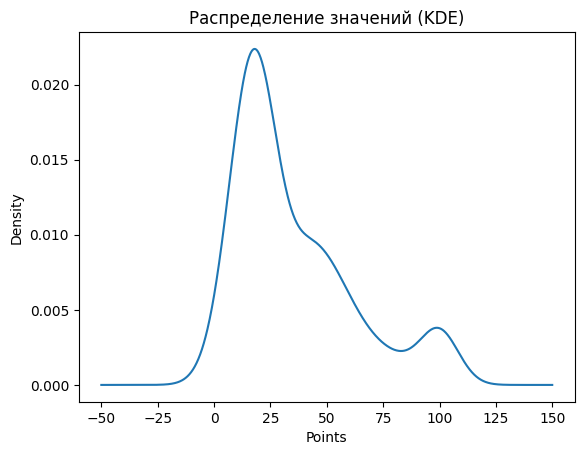

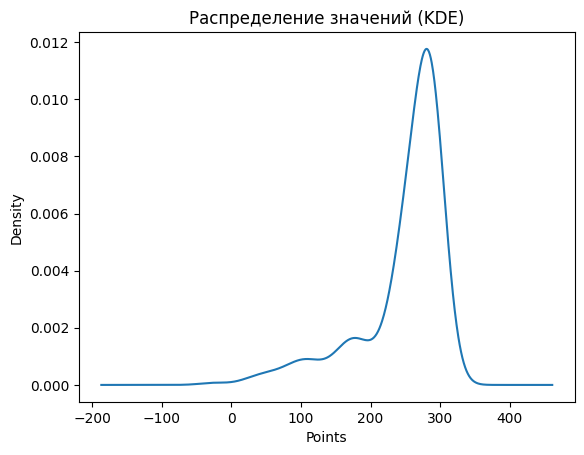

In [133]:
import pandas as pd
import matplotlib.pyplot as plt


# Построение KDE
data_train_['age'].plot(kind='kde')
plt.title('Распределение значений (KDE)')
plt.xlabel('Points')
plt.ylabel('Density')
plt.show()

data_train_['dateOfBirth'].plot(kind='kde')
plt.title('Распределение значений (KDE)')
plt.xlabel('Points')
plt.ylabel('Density')
plt.show()

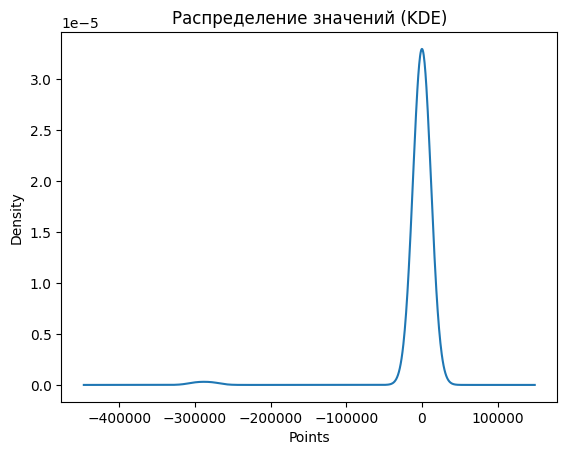

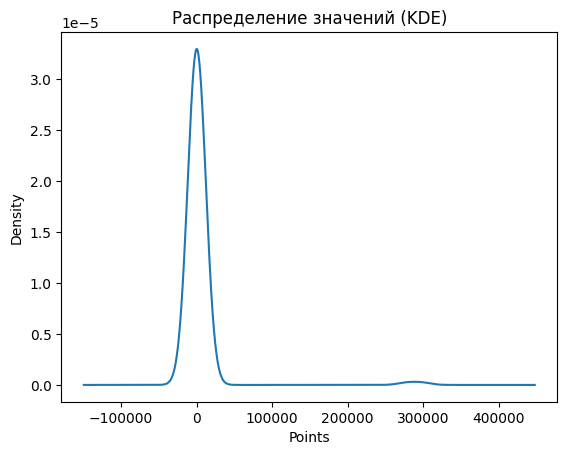

In [134]:
# Построение KDE
data_test_['age'].plot(kind='kde')
plt.title('Распределение значений (KDE)')
plt.xlabel('Points')
plt.ylabel('Density')
plt.show()

data_test_['dateOfBirth'].plot(kind='kde')
plt.title('Распределение значений (KDE)')
plt.xlabel('Points')
plt.ylabel('Density')
plt.show()

In [135]:
data_train_['age'] = data_train_['age'].fillna(data_train_['age'].median())
data_train_['dateOfBirth'] = data_train_['dateOfBirth'].fillna(data_train_['dateOfBirth'].median())
# data_train_['culture'] = data_train_['dateOfBirth'].fillna(data_train_['culture'].mode()[0])
# data_train_['title'] = data_train_['title'].fillna(data_train_['title'].mode()[0])

data_test_['age'] = data_test_['age'].fillna(data_test_['age'].median())
data_test_['dateOfBirth'] = data_test_['dateOfBirth'].fillna(data_test_['dateOfBirth'].median())
# data_test_['culture'] = data_test_['dateOfBirth'].fillna(data_test_['culture'].mode()[0])
# data_test_['title'] = data_test_['title'].fillna(data_test_['title'].mode()[0])

In [137]:
data_train_.drop(columns=['culture', 'title'], inplace=True)
data_test_.drop(columns=['culture', 'title'], inplace=True)

In [139]:
data_test_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              389 non-null    int64  
 1   dateOfBirth       389 non-null    float64
 2   isMarried         389 non-null    int64  
 3   isNoble           389 non-null    int64  
 4   age               389 non-null    float64
 5   numDeadRelations  389 non-null    float64
 6   popularity        389 non-null    float64
 7   family_tag        389 non-null    object 
 8   appearance        389 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 38.5+ KB


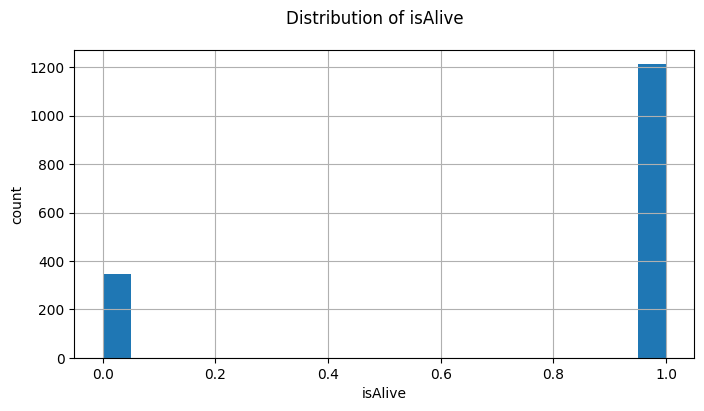

In [140]:
plt.figure(figsize = (8, 4))
data_train_['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')
plt.suptitle('Distribution of isAlive')
plt.show()

In [141]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder_1 = OneHotEncoder(sparse_output=False)
encoder_2 = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded_train = encoder_1.fit_transform(data_train_[['family_tag']])
one_hot_encoded_test = encoder_2.fit_transform(data_test_[['family_tag']])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_train = pd.DataFrame(one_hot_encoded_train, columns=encoder_1.get_feature_names_out(['family_tag']), index=data_train_.index)
one_hot_test = pd.DataFrame(one_hot_encoded_test, columns=encoder_2.get_feature_names_out(['family_tag']), index=data_test_.index)

In [142]:
one_hot_train

,family_tag_Arryn,family_tag_Baratheon,family_tag_Florent,family_tag_Frey,family_tag_Greyjoy,family_tag_Iron,family_tag_Lannister,family_tag_Oakheart,family_tag_Osgrey,family_tag_Other,family_tag_Stark,family_tag_Targaryen,family_tag_Tully,family_tag_Tyrell,family_tag_Wood
S.No,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
data_train_ = pd.concat([data_train_, one_hot_train], axis=1)
data_test_ = pd.concat([data_test_, one_hot_test], axis=1)
print(data_train_.shape, data_test_.shape)

(1557, 25) (389, 23)


In [117]:
print(data_train_.columns)
print(data_test_.columns)

Index(['title', 'male', 'culture', 'dateOfBirth', 'isMarried', 'isNoble',
       'age', 'numDeadRelations', 'popularity', 'isAlive', 'isPopular',
       'boolDeadRelations', 'family_tag', 'appearance', 'family_tag_Arryn',
       'family_tag_Baratheon', 'family_tag_Florent', 'family_tag_Frey',
       'family_tag_Greyjoy', 'family_tag_Iron', 'family_tag_Lannister',
       'family_tag_Oakheart', 'family_tag_Osgrey', 'family_tag_Other',
       'family_tag_Stark', 'family_tag_Targaryen', 'family_tag_Tully',
       'family_tag_Tyrell', 'family_tag_Wood'],
      dtype='object')
Index(['title', 'male', 'culture', 'dateOfBirth', 'isMarried', 'isNoble',
       'age', 'numDeadRelations', 'popularity', 'isPopular',
       'boolDeadRelations', 'family_tag', 'appearance', 'family_tag_Arryn',
       'family_tag_Baratheon', 'family_tag_Florent', 'family_tag_Frey',
       'family_tag_Greyjoy', 'family_tag_Lannister', 'family_tag_Oakheart',
       'family_tag_Osgrey', 'family_tag_Other', 'family_tag_Sta

In [144]:
data_test_['family_tag_Iron'] = np.zeros(len(data_test_))
print(data_train_.shape, data_test_.shape)

(1557, 25) (389, 24)


In [145]:
data_train_.drop(columns=['family_tag'], inplace=True)
data_test_.drop(columns=['family_tag'], inplace=True)

In [146]:
print(data_train_.shape, data_test_.shape)
# print(*data_train_.columns)
# print(*data_test_.columns)

(1557, 24) (389, 23)


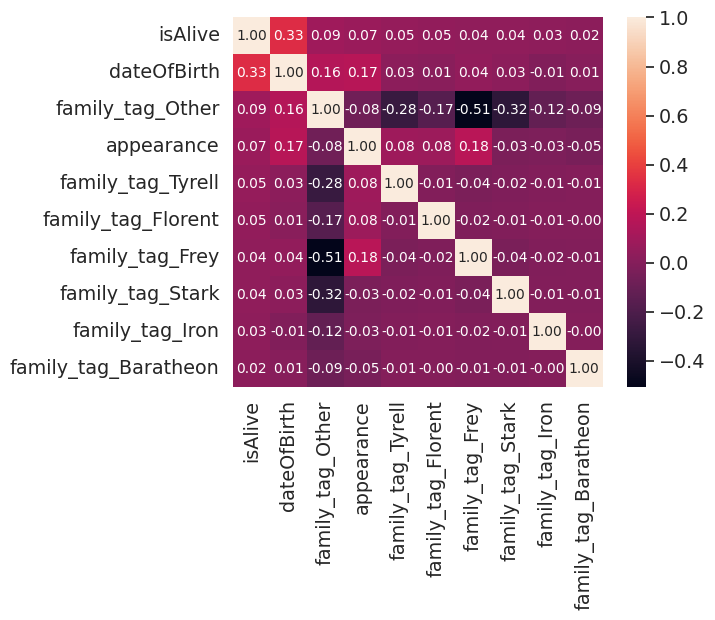

In [147]:
import numpy as np
# correlation matrix
corrmat = data_train_.corr()
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [148]:
X = data_train_.drop('isAlive', axis=1)
y = data_train_['isAlive']
print(X.shape, y.shape)

(1557, 23) (1557,)


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=21)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [153]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1.5)
# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
from sklearn.gaussian_process.kernels import RBF

# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

# RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# GaussianProcessClassifier
gaussprocess = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0), random_state=0)
gaussprocess.fit(X_train, y_train)
y_pred_gaussprocess = gaussprocess.predict(X_test)

# GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred_naive = naive.predict(X_test)

# KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=3)
kneigh.fit(X_train, y_train)
y_pred_kneigh = kneigh.predict(X_test)

# SVC
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# # DecisionTreeClassifier
# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)
# y_pred_tree = tree.predict(X_test)

In [155]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=10, verbose=True)
grid_search.fit(X_train, y_train)

# # Best score and estimator
# print("best accuracy", grid_search.best_score_)
# print(grid_search.best_estimator_)
y_pred_tree = grid_search.predict(X_test)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [156]:
from sklearn.metrics import accuracy_score

In [157]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


In [158]:
accuracy = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy AdaBoost : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy Random forest : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_gaussprocess)
print("Accuracy Gausian Process : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_naive)
print("Accuracy Naive: %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_kneigh)
print("Accuracy K-NN : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy SVC : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree : %.4f" % accuracy)

Accuracy AdaBoost : 0.8141
Accuracy Random forest : 0.8173
Accuracy Gausian Process : 0.8397
Accuracy Naive: 0.2724
Accuracy K-NN : 0.8173
Accuracy SVC : 0.8205
Accuracy Decision Tree : 0.7981


In [159]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.35MB/s]


In [160]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [161]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [162]:
true_preds = gaussprocess.predict(data_test_.to_numpy())
true_preds

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [163]:
submission['isAlive'] = true_preds
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


In [164]:
submission.to_csv("/content/new_submission.csv", index=False)